# Data EDA and visualization

In [73]:
import os

import pandas as pd
import numpy as np

import cv2

import matplotlib.pyplot as plt

In [65]:
# defining working folders and labels
train_images_folder = "severstal-steel-defect-detection/train_images"
train_labels_file = "severstal-steel-defect-detection/train.csv"

test_images_folder = "severstal-steel-defect-detection/test_images"
test_labels_file = "severstal-steel-defect-detection/sample_submission.csv"

In [66]:
train_labels = pd.read_csv(train_labels_file)
test_labels = pd.read_csv(test_labels_file)

In [67]:
train_labels

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


## Data exploration

### Defective vs Non-defective

In [68]:
new_train = train_labels.copy()

In [74]:
new_train.drop_duplicates("ImageId", keep="last", inplace=True)

In [75]:
images = os.listdir(train_images_folder)
present_rows = new_train.ImageId.tolist()
for img in images:
    if img not in present_rows:
        new_train = new_train.append({"ImageId" : img, "ClassId" : 1, "EncodedPixels" : None}, 
                                            ignore_index=True)


In [71]:
for index, row in new_train.iterrows():
  new_train.at[index, "EncodedPixels"] = int(new_train.at[index, "EncodedPixels"] is not None)

Text(0.5, 1.0, 'Defective vs non-defective')

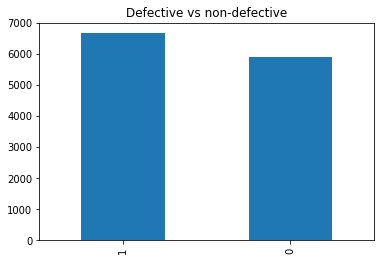

In [76]:
ax = new_train.EncodedPixels.value_counts().plot(kind="bar")
plt.title("Defective vs non-defective")

### Defects' classes distribution

Text(0.5, 1.0, 'Distribution of defects` classes')

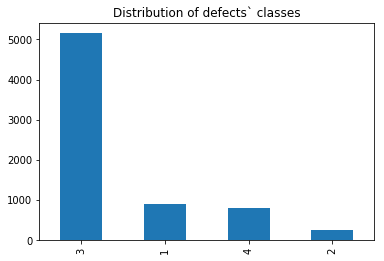

In [77]:
ax =  train_labels.ClassId.value_counts().plot(kind="bar")
plt.title("Distribution of defects` classes")

### Number of different defects' classes on images

Text(0.5, 1.0, 'Number of classes on images')

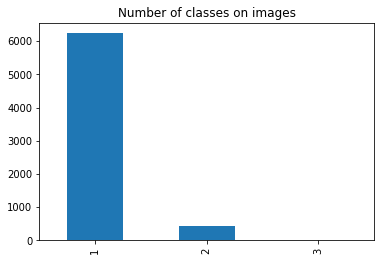

In [78]:
dups_id = pd.DataFrame(train_labels.pivot_table(index=['ImageId'], aggfunc='size'), columns=['Duplicates'])
dups_id.Duplicates.value_counts().plot(kind='bar')
plt.title("Number of classes on images")

## Data visualization

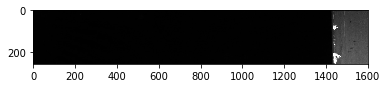

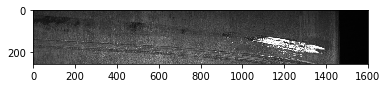

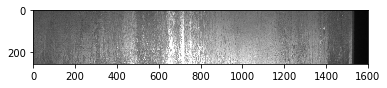

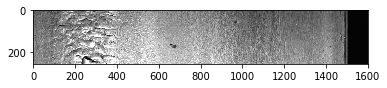

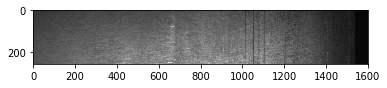

In [89]:
images = os.listdir(train_images_folder)
for i in range(5):
    plt.imshow(plt.imread(os.path.join(train_images_folder, images[i])))
    plt.show()

In [81]:
#RLE encoding and decoding

In [83]:
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [84]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    
    return img.reshape(shape).T

0002cc93b.jpg


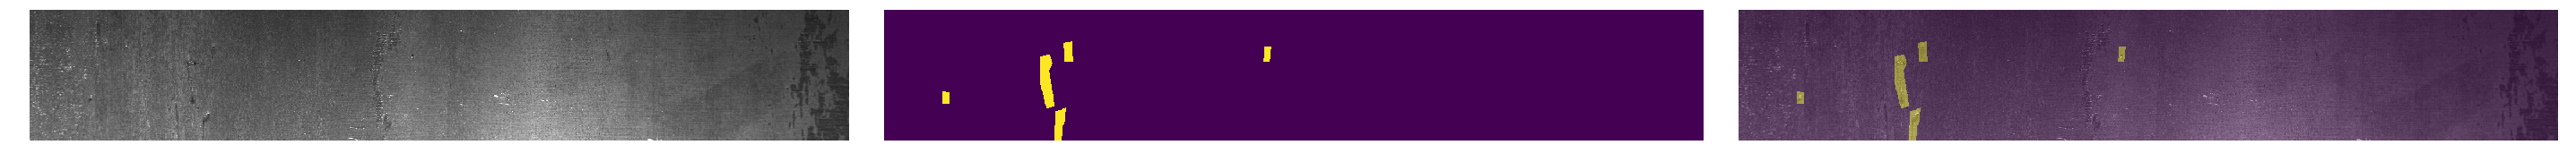

0007a71bf.jpg


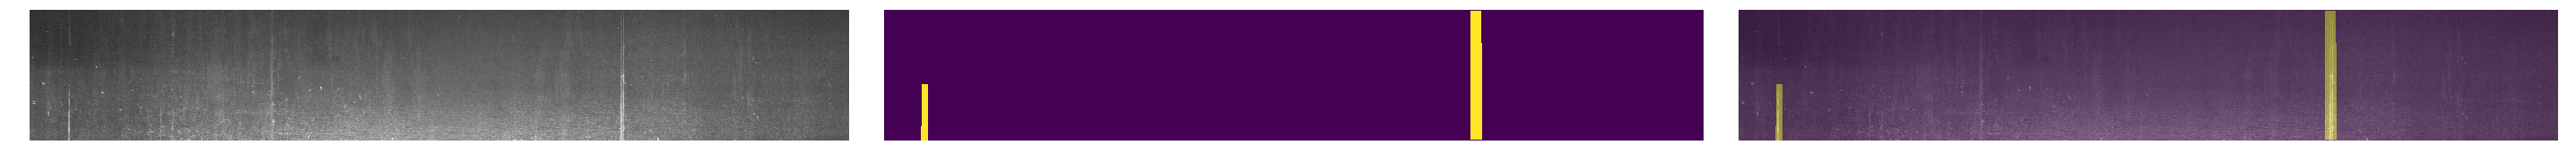

000a4bcdd.jpg


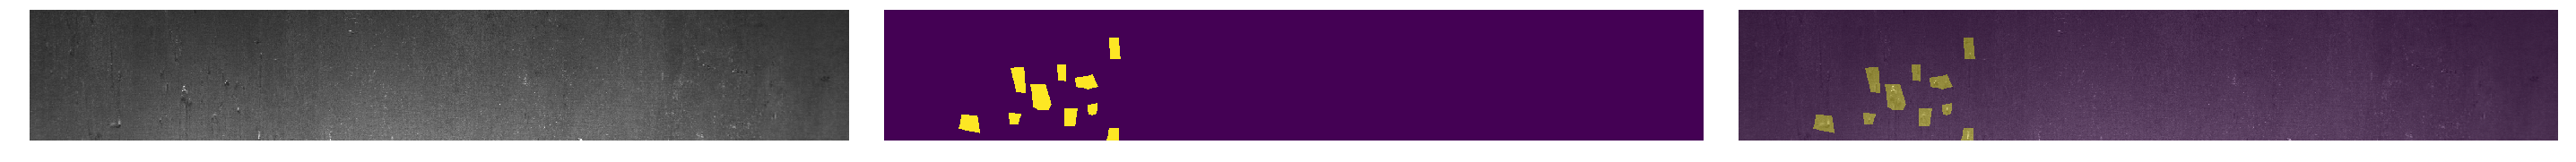

000f6bf48.jpg


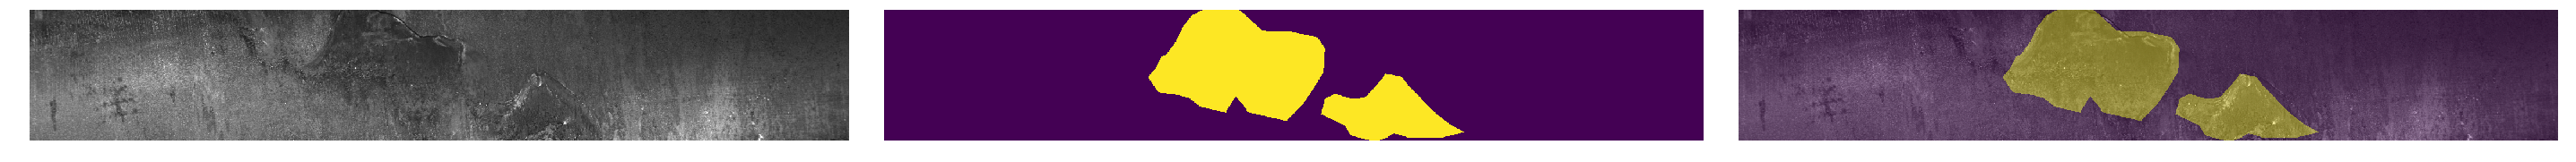

0014fce06.jpg


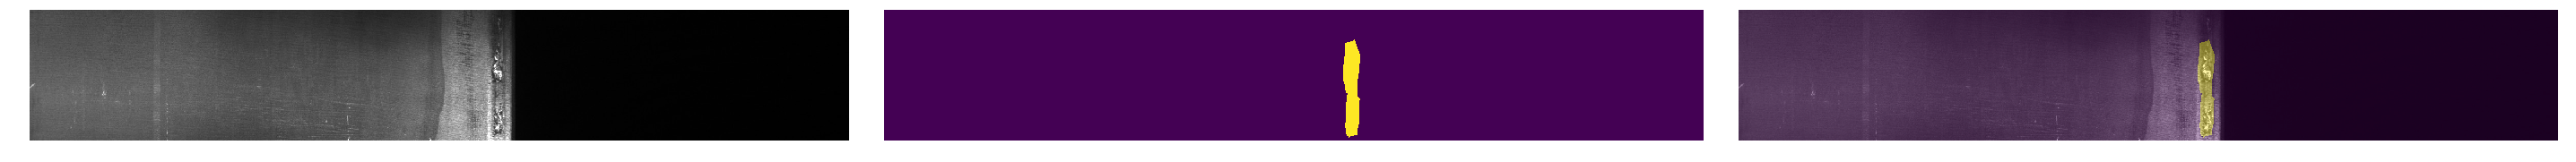

In [88]:
count = 0
for index, row in train_labels.iterrows():
    count += 1
    if count > 5:
        break
    print(row["ImageId"])
    
    img_id = row["ImageId"]

    img = plt.imread(os.path.join(train_images_folder,img_id))
    img_masks = train_labels.EncodedPixels[train_labels.ImageId == img_id].to_list()[0]

    mask = rle_decode(img_masks,(1600,256))


    fig, axarr = plt.subplots(1, 3, figsize=(40, 15))
    axarr[0].axis('off')
    axarr[1].axis('off')
    axarr[2].axis('off')
    axarr[0].imshow(img)
    axarr[1].imshow(mask)
    axarr[2].imshow(img)
    axarr[2].imshow(mask, alpha=0.4)
    plt.tight_layout(h_pad=0.1, w_pad=0.1)
    plt.show()